In [50]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gudhi
from IPython.display import display, HTML

In [4]:
with open('data/datasaurus.json', 'r') as f:
    datasaurus = json.load(f)

for name in datasaurus:
    datasaurus[name] = np.array(datasaurus[name])

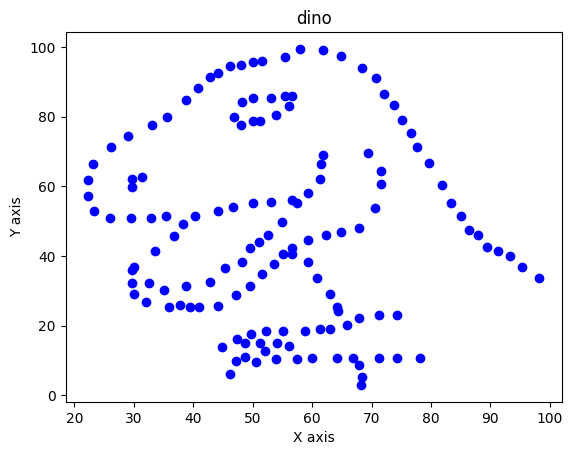

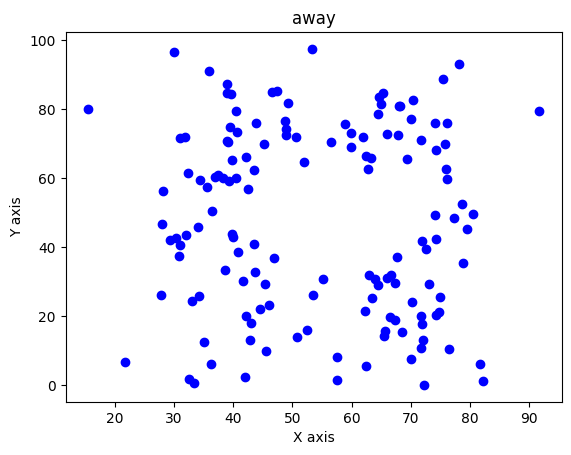

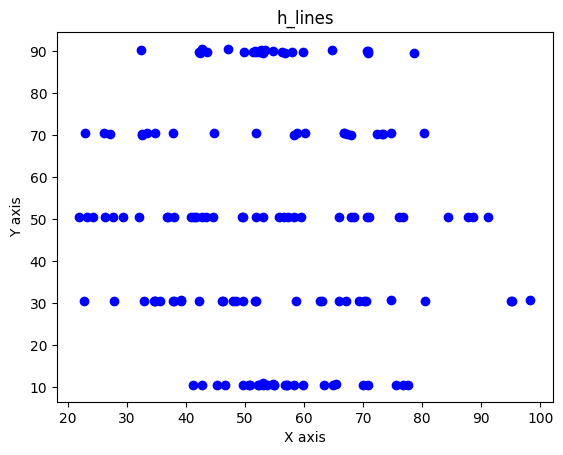

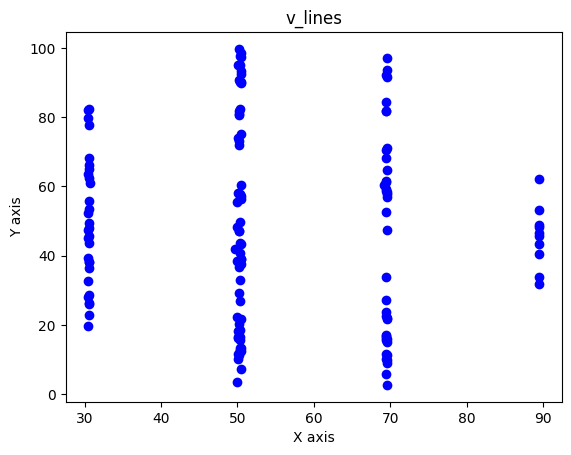

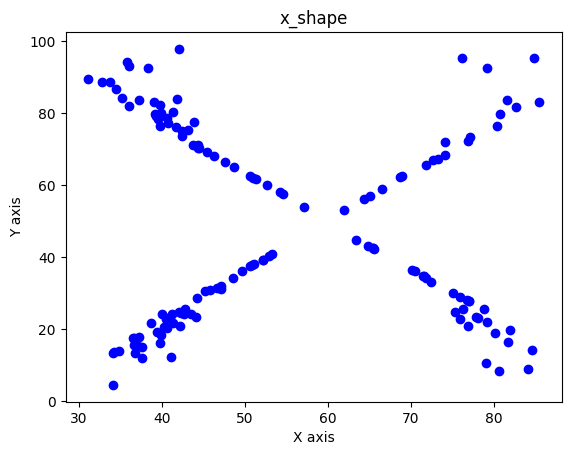

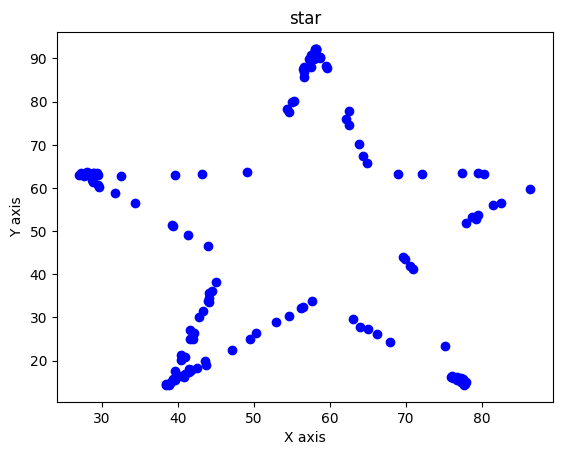

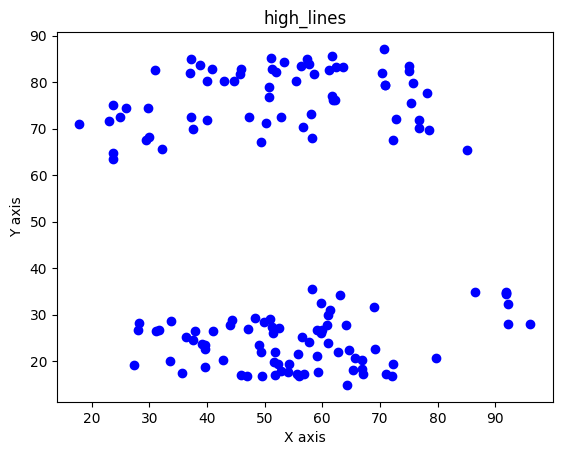

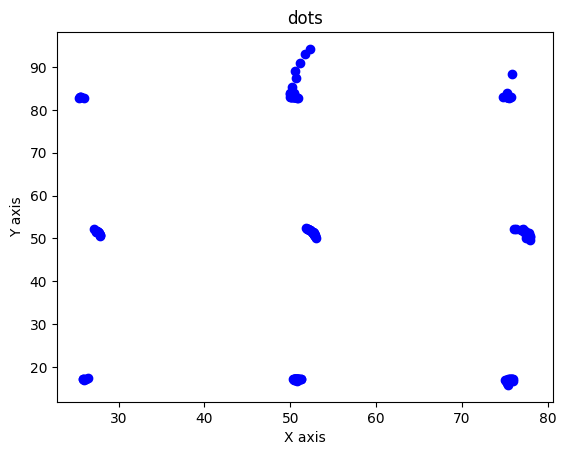

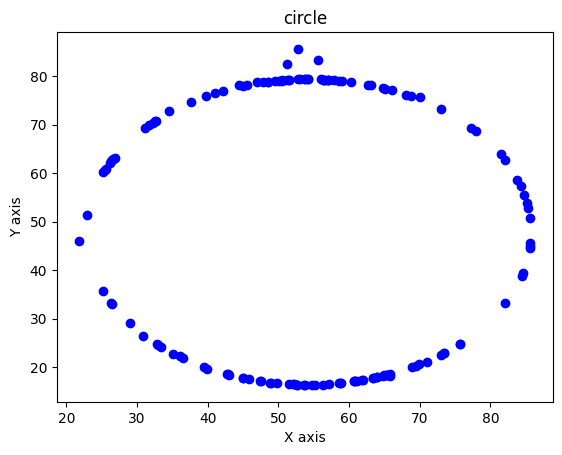

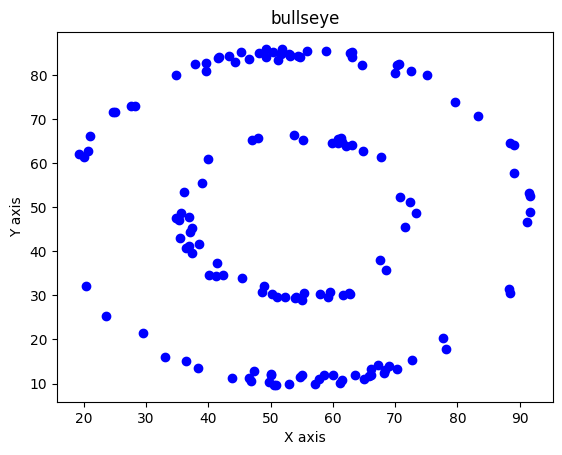

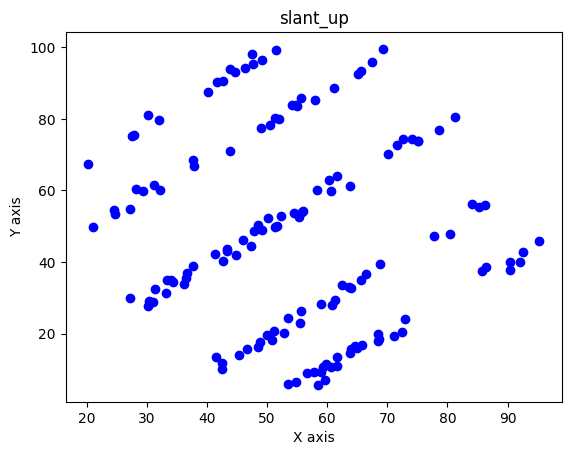

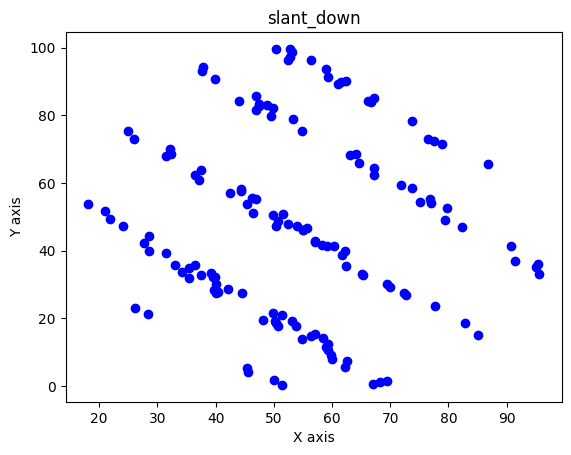

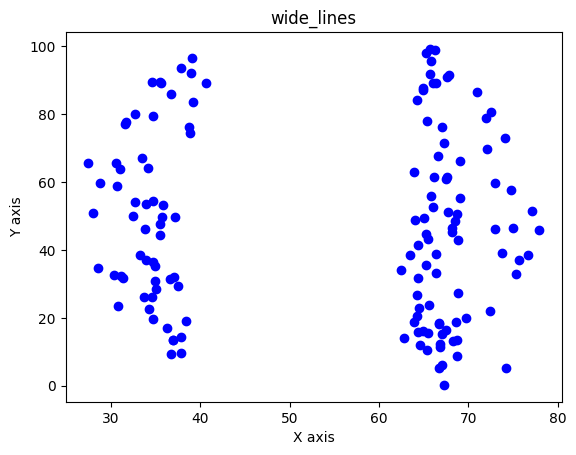

In [6]:
for name, values in datasaurus.items():
    x_coords = [p[0] for p in values]
    y_coords = [p[1] for p in values]

    # Plot points
    plt.scatter(x_coords, y_coords, color='blue')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title(name)
    plt.show()

In [16]:
def mean_cov(values):
    mean = np.round(np.mean(values, axis=0), 2)
    cov_matrix = np.cov(values, rowvar=False)
    cov = np.round([cov_matrix[0, 0], cov_matrix[1, 1]], 2)
    return mean, cov


In [17]:

rows = []
for name, values in datasaurus.items():
    mean, covariance = mean_cov(values)
    rows.append({
        "Dataset": name,
        "Mean": mean,
        "Covariance": covariance
    })

df = pd.DataFrame(rows)
df

,Dataset,Mean,Covariance
0,dino,"[54.26, 47.83]","[281.07, 725.52]"
1,away,"[54.27, 47.83]","[281.23, 725.75]"
2,h_lines,"[54.26, 47.83]","[281.1, 725.76]"
3,v_lines,"[54.27, 47.84]","[281.23, 725.64]"
4,x_shape,"[54.26, 47.84]","[281.23, 725.22]"
5,star,"[54.27, 47.84]","[281.2, 725.24]"
6,high_lines,"[54.27, 47.84]","[281.12, 725.76]"
7,dots,"[54.26, 47.84]","[281.16, 725.24]"
8,circle,"[54.27, 47.84]","[280.9, 725.23]"
9,bullseye,"[54.27, 47.83]","[281.21, 725.53]"


In [22]:
def rips_persistence(points, max_dimension=2):
    rips_complex = gudhi.RipsComplex(points=points)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
    print(result_str)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    pers_homology = simplex_tree.persistence()
    return pers_homology


Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


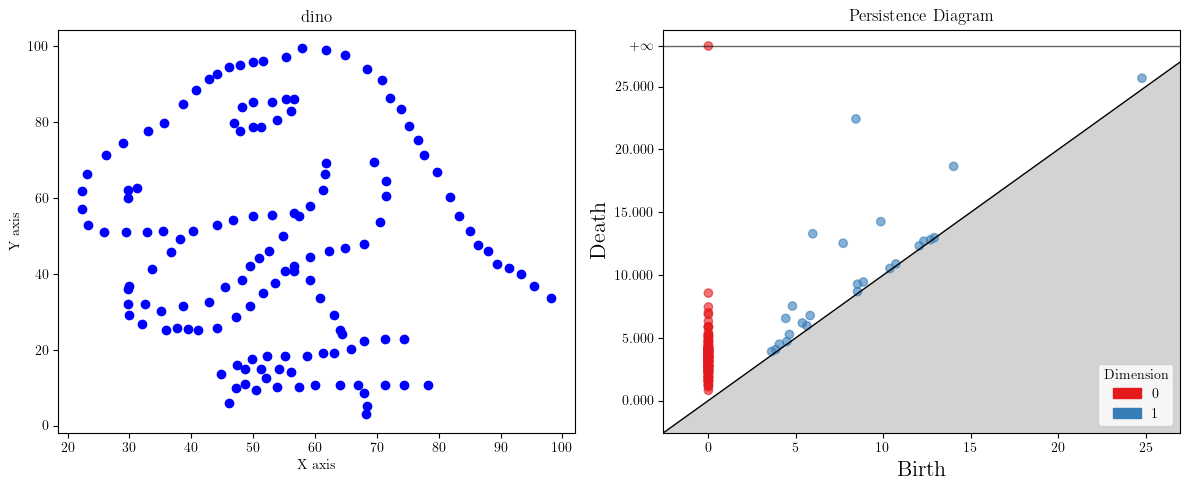

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


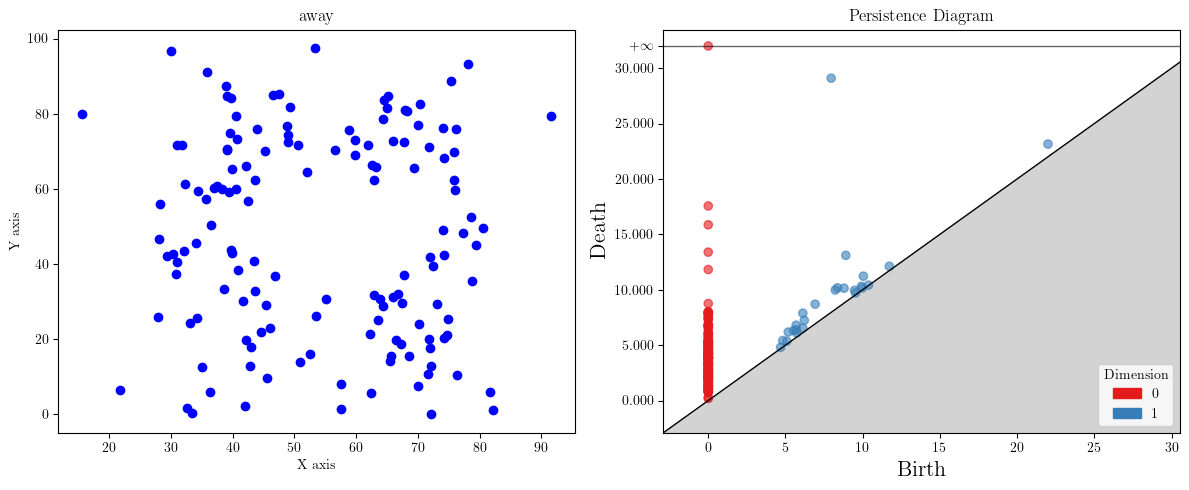

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


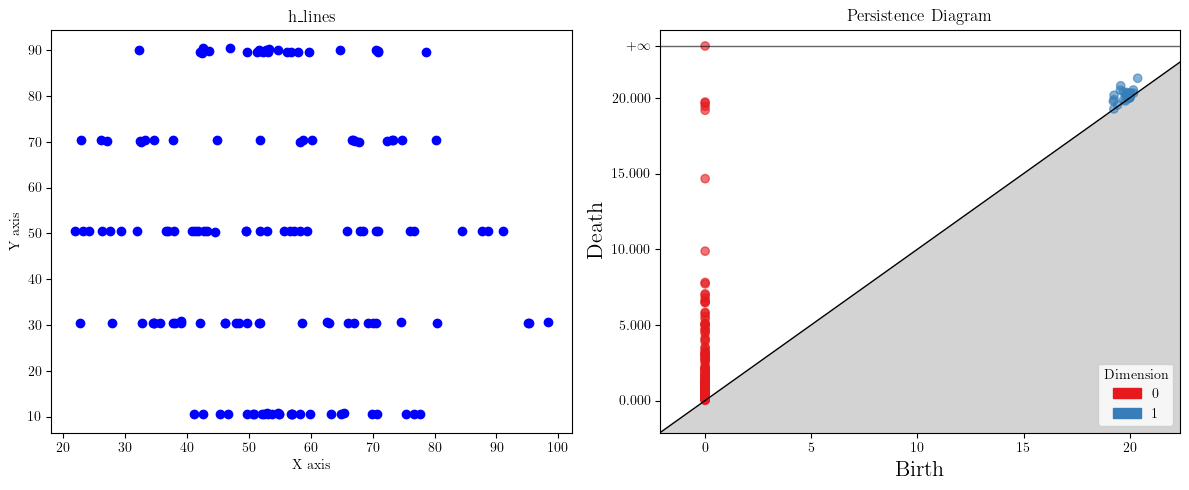

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


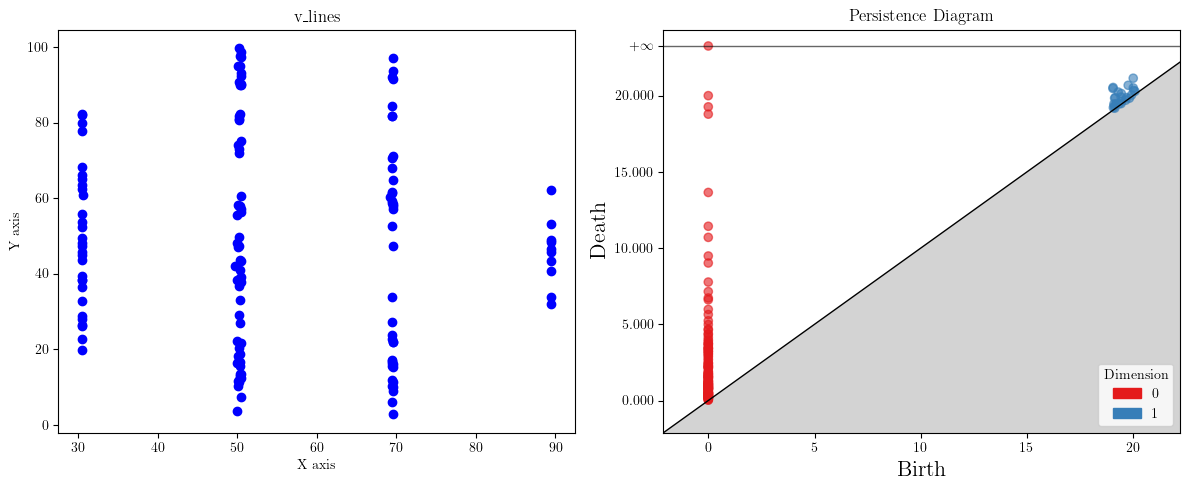

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


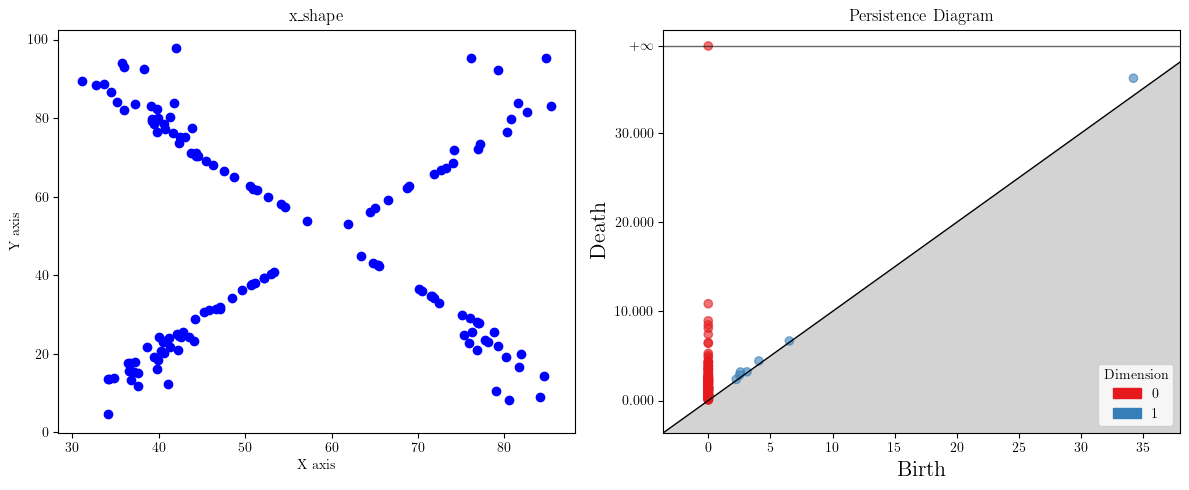

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


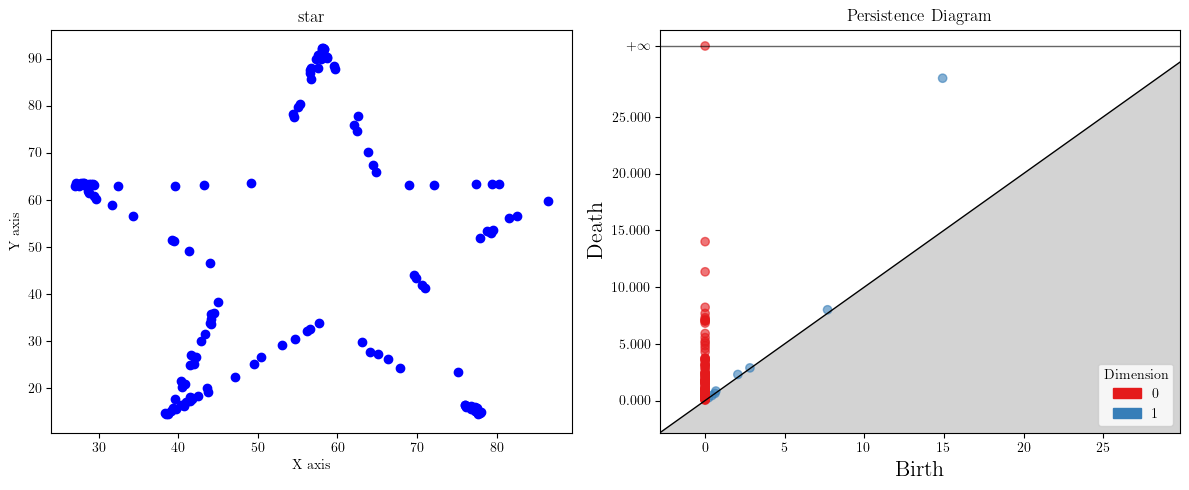

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


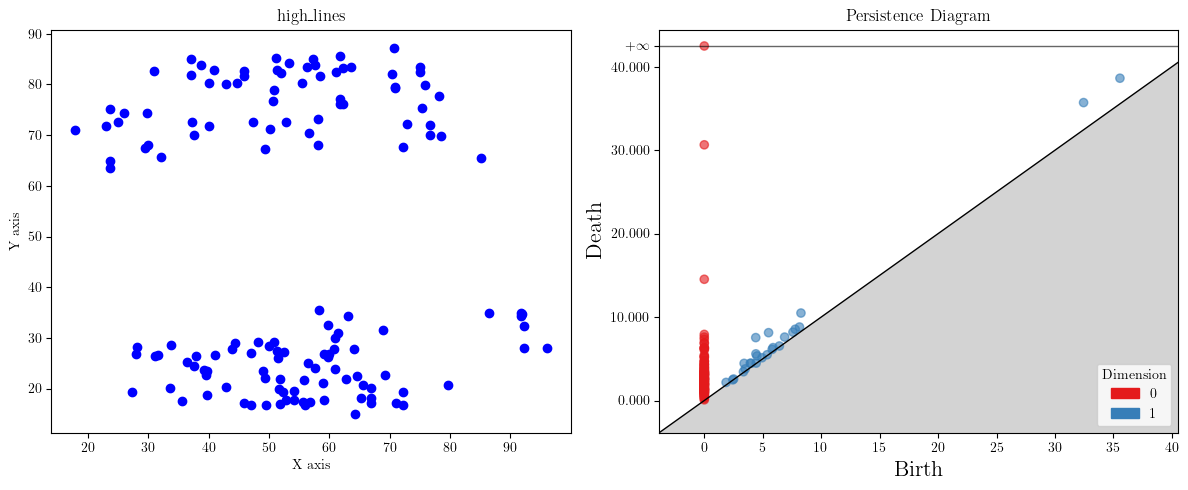

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


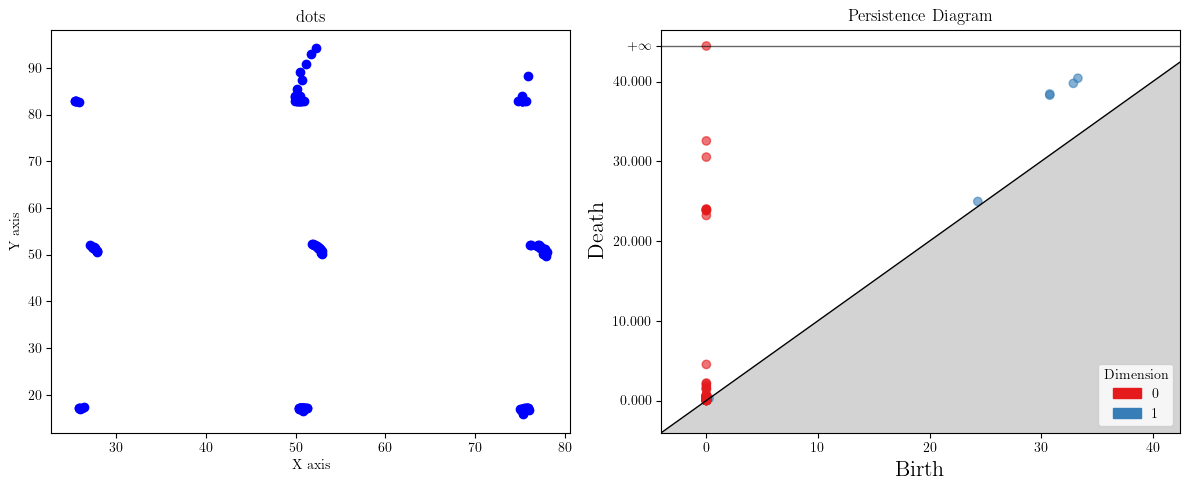

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


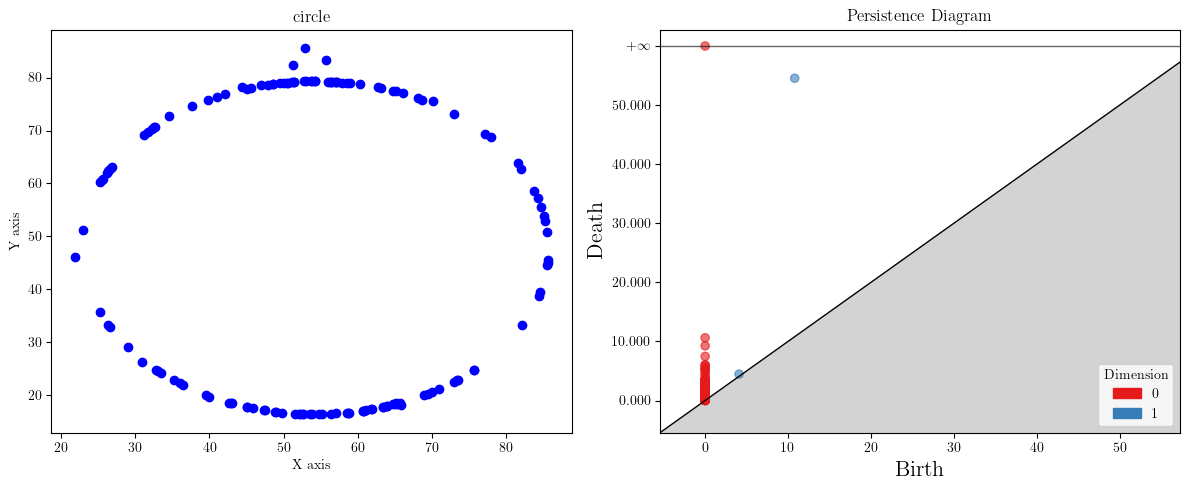

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


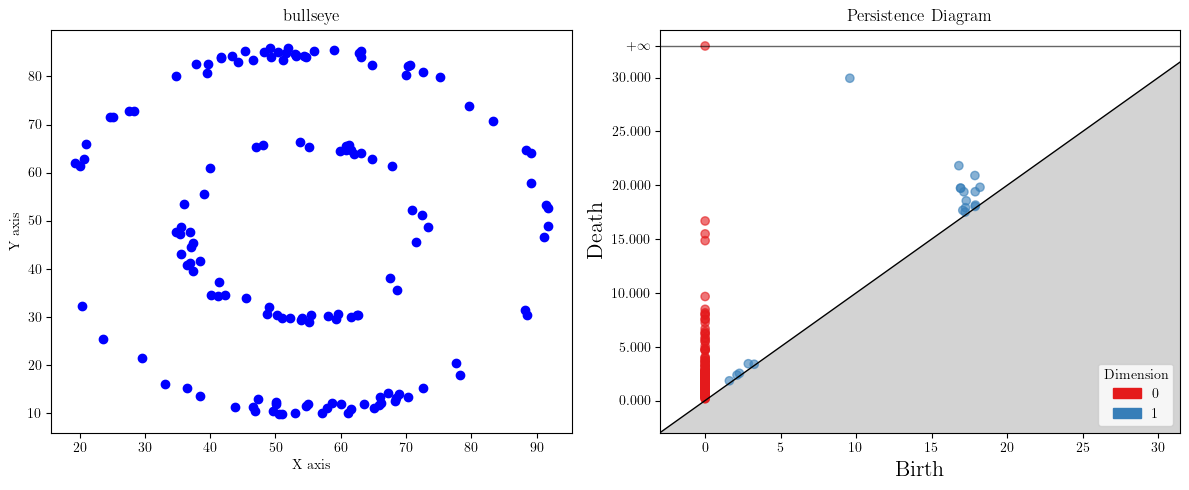

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


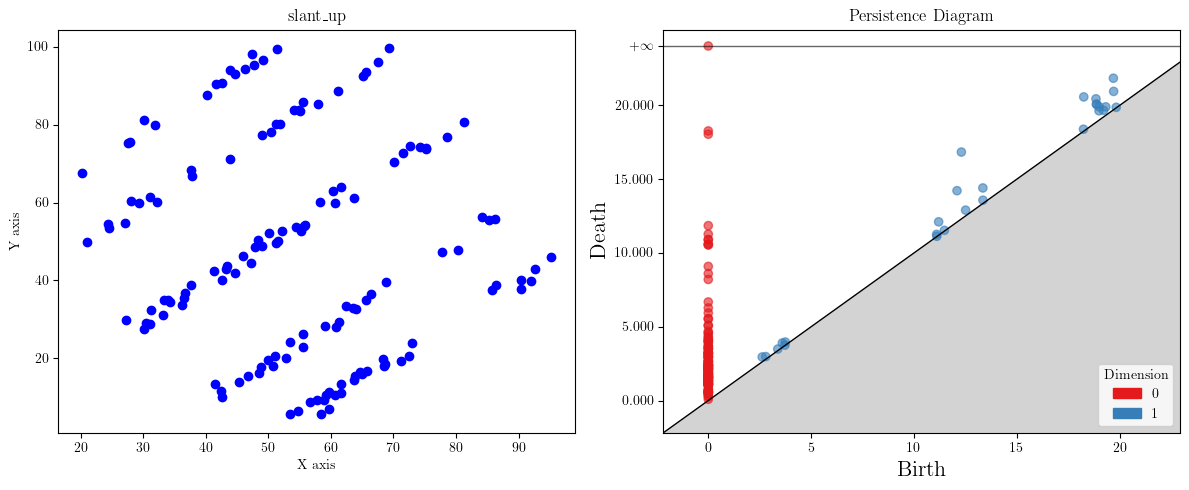

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


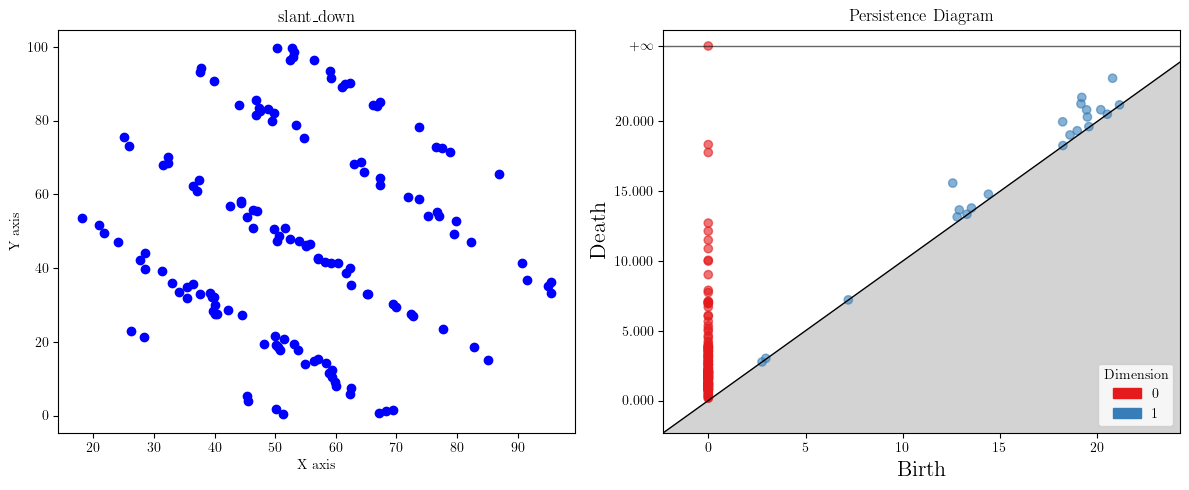

Rips complex is of dimension 2 - 477333 simplices - 142 vertices.


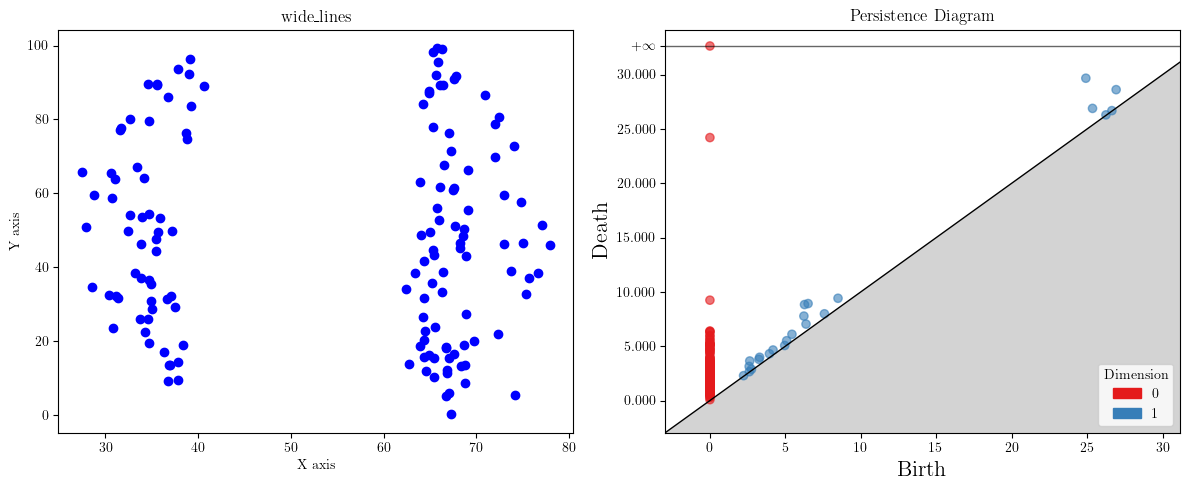

In [23]:
def plot_dataset(ax, name, values):
    # Separate x and y coordinates
    x_coords = [p[0] for p in values]
    y_coords = [p[1] for p in values]

    # Plot on the given axis
    ax.scatter(x_coords, y_coords, color='blue')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(name)

# Iterate through datasets and plot side-by-side figures
for name, values in datasaurus.items():
    pers_homology = rips_persistence(values)

    # Create figure with two side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the dataset on the first subplot
    plot_dataset(axes[0], name, values)

    # Plot the persistence diagram on the second subplot
    gudhi.plot_persistence_diagram(pers_homology, axes=axes[1])
    axes[1].set_title("Persistence Diagram")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [38]:
# Wrócimy tutaj jeszcze pod koniec

In [63]:
def filter_inf(diag):
    return diag[np.isfinite(diag[:,1])]

def rips_persistence_intervals(points):
    rips = gudhi.RipsComplex(points=points, max_edge_length=2.0)
    st = rips.create_simplex_tree(max_dimension=2)
    st.compute_persistence()

    diag0 = st.persistence_intervals_in_dimension(0)
    diag1 = st.persistence_intervals_in_dimension(1)

    # diag0 = filter_inf(st.persistence_intervals_in_dimension(0))
    # diag1 = filter_inf(st.persistence_intervals_in_dimension(1))
    return diag0, diag1  # Return persistence intervals for dims 0 and 1

def bottleneck(points0, points1):
    diag0_0, diag1_0 = rips_persistence_intervals(points0)
    diag0_1, diag1_1 = rips_persistence_intervals(points1)

    dist_dim0 = gudhi.bottleneck_distance(diag0_0, diag0_1)
    dist_dim1 = gudhi.bottleneck_distance(diag1_0, diag1_1)

    return dist_dim0, dist_dim1


In [65]:
names = list(datasaurus.keys())
df = pd.DataFrame(index=names, columns=names, dtype=object)

# Parameters for shifting and clamping
shift = 0.1    # Small shift to make colors visible
max_val0 = 1.0  # Maximum value for dim0 distances
max_val1 = 1.0  # Maximum value for dim1 distances

# Colormaps
cmap0 = plt.cm.Blues
cmap1 = plt.cm.Reds

def color_to_hex(color):
    """Convert RGBA color to hex."""
    return '#{:02x}{:02x}{:02x}'.format(
        int(color[0] * 255),
        int(color[1] * 255),
        int(color[2] * 255)
    )

for name1 in names:
    for name2 in names:
        dist0, dist1 = bottleneck(datasaurus[name1], datasaurus[name2])

        # Shift and clip distances to avoid white color
        clipped0 = min(dist0 + shift, max_val0) / max_val0
        clipped1 = min(dist1 + shift, max_val1) / max_val1

        # Map shifted distances to colors
        color0 = color_to_hex(cmap0(clipped0))
        color1 = color_to_hex(cmap1(clipped1))

        df.loc[name1, name2] = (
            f"<div style='display:flex; flex-direction: column; gap: 2px;'>"
            f"<div style='background:{color0}; padding:4px; border-radius:4px; text-align:center; color: white;'>"
            f"<b>dim0:</b> {dist0:.3f}</div>"
            f"<div style='background:{color1}; padding:4px; border-radius:4px; text-align:center; color: white;'>"
            f"<b>dim1:</b> {dist1:.3f}</div>"
            f"</div>"
        )

# Display the formatted DataFrame with HTML rendering
display(HTML(df.to_html(escape=False)))


,dino,away,h_lines,v_lines,x_shape,star,high_lines,dots,circle,bullseye,slant_up,slant_down,wide_lines
dino,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.079,dim0: infdim1: inf,dim0: infdim1: 0.019,dim0: infdim1: 0.000,dim0: infdim1: 0.112,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000
away,dim0: infdim1: 0.000,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.079,dim0: infdim1: inf,dim0: infdim1: 0.019,dim0: infdim1: 0.000,dim0: infdim1: 0.112,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000
h_lines,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.079,dim0: infdim1: inf,dim0: infdim1: 0.019,dim0: infdim1: 0.000,dim0: infdim1: 0.112,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000
v_lines,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.079,dim0: infdim1: inf,dim0: infdim1: 0.019,dim0: infdim1: 0.000,dim0: infdim1: 0.112,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000
x_shape,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.079,dim0: infdim1: inf,dim0: infdim1: 0.019,dim0: infdim1: 0.000,dim0: infdim1: 0.112,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000
star,dim0: infdim1: 0.079,dim0: infdim1: 0.079,dim0: infdim1: 0.079,dim0: infdim1: 0.079,dim0: infdim1: 0.079,dim0: 0.000dim1: 0.000,dim0: infdim1: inf,dim0: infdim1: 0.079,dim0: infdim1: 0.079,dim0: infdim1: 0.112,dim0: infdim1: 0.079,dim0: infdim1: 0.079,dim0: infdim1: 0.079
high_lines,dim0: infdim1: inf,dim0: infdim1: inf,dim0: infdim1: inf,dim0: infdim1: inf,dim0: infdim1: inf,dim0: infdim1: inf,dim0: 0.000dim1: 0.000,dim0: infdim1: inf,dim0: infdim1: inf,dim0: infdim1: inf,dim0: infdim1: inf,dim0: infdim1: inf,dim0: 0.203dim1: inf
dots,dim0: infdim1: 0.019,dim0: infdim1: 0.019,dim0: infdim1: 0.019,dim0: infdim1: 0.019,dim0: infdim1: 0.019,dim0: infdim1: 0.079,dim0: infdim1: inf,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.019,dim0: infdim1: 0.112,dim0: infdim1: 0.019,dim0: infdim1: 0.019,dim0: infdim1: 0.019
circle,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.079,dim0: infdim1: inf,dim0: infdim1: 0.019,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.112,dim0: infdim1: 0.000,dim0: infdim1: 0.000,dim0: infdim1: 0.000
bullseye,dim0: infdim1: 0.112,dim0: infdim1: 0.112,dim0: infdim1: 0.112,dim0: infdim1: 0.112,dim0: infdim1: 0.112,dim0: infdim1: 0.112,dim0: infdim1: inf,dim0: infdim1: 0.112,dim0: infdim1: 0.112,dim0: 0.000dim1: 0.000,dim0: infdim1: 0.112,dim0: infdim1: 0.112,dim0: infdim1: 0.112
